In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('sample_data/diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
corr_matrix = df.corr()
corr_matrix[(corr_matrix > 0.9)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Glucose,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BloodPressure,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
SkinThickness,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Insulin,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
BMI,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
DiabetesPedigreeFunction,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Outcome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


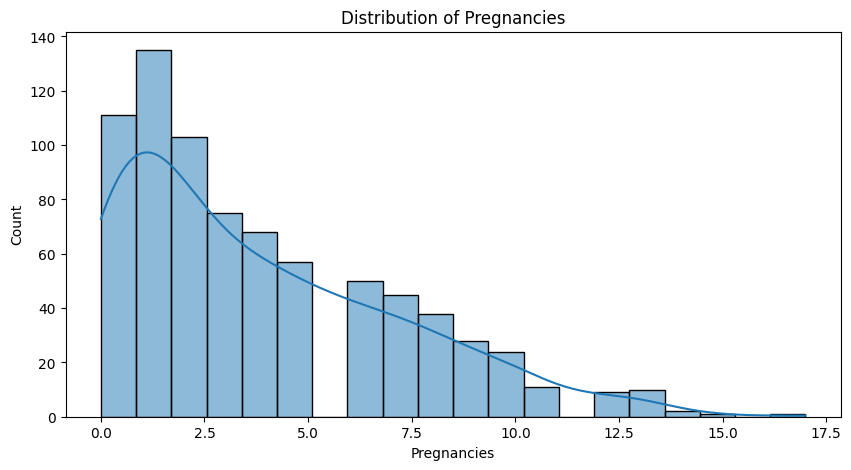

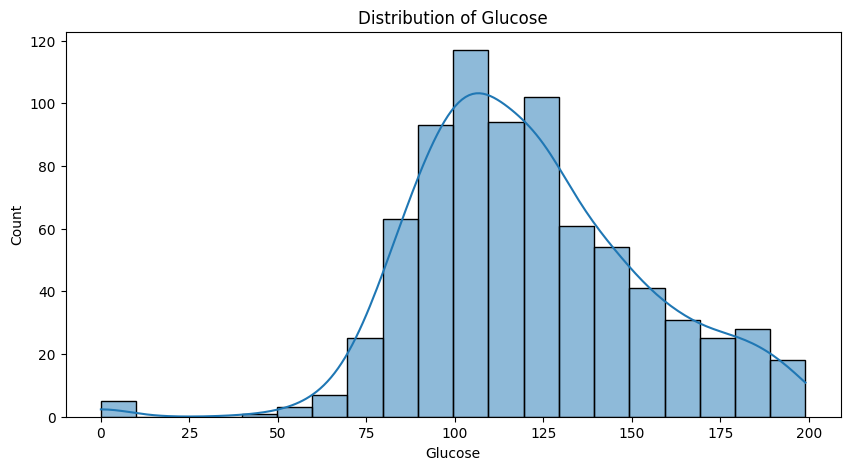

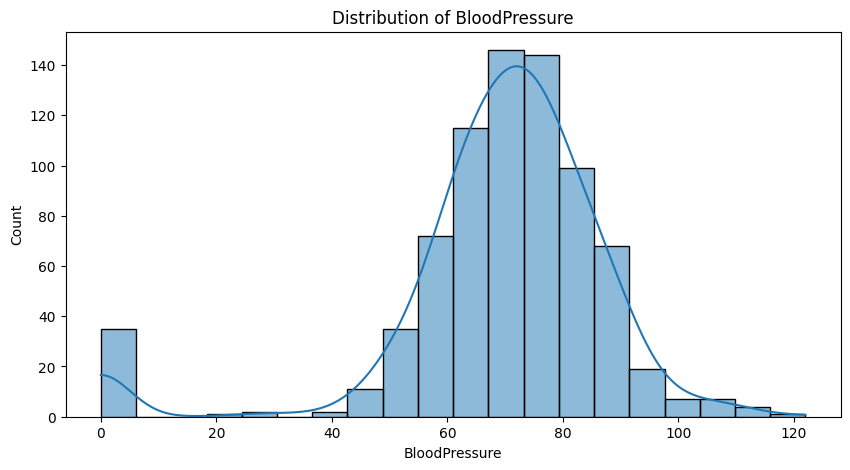

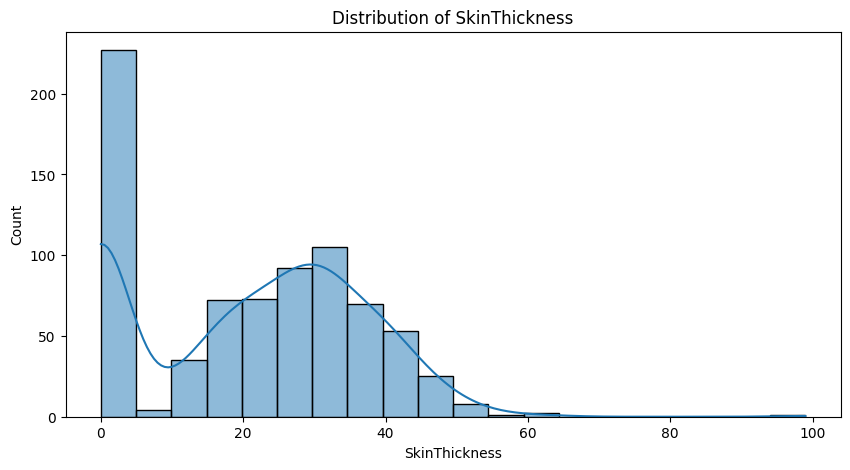

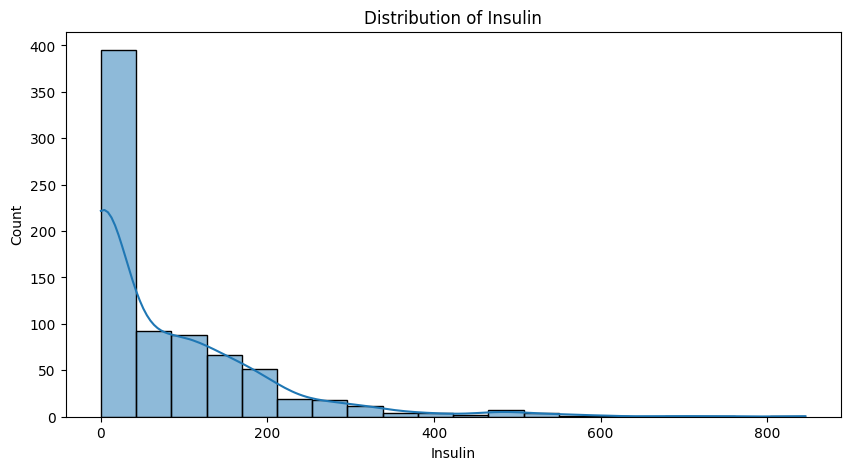

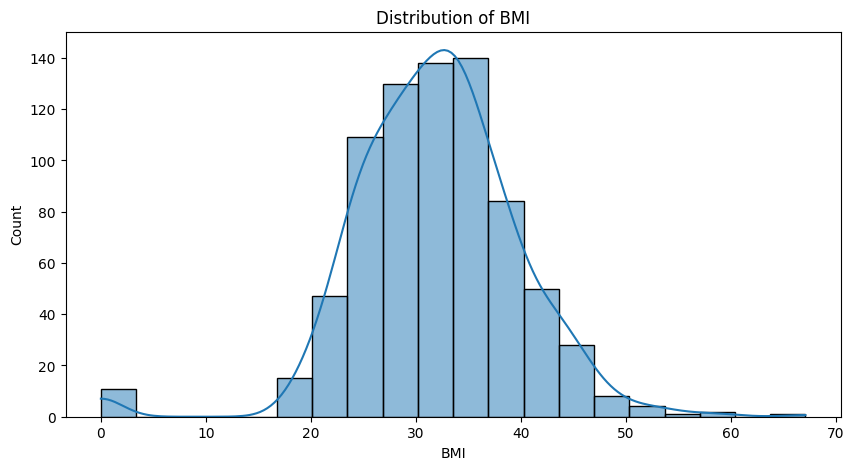

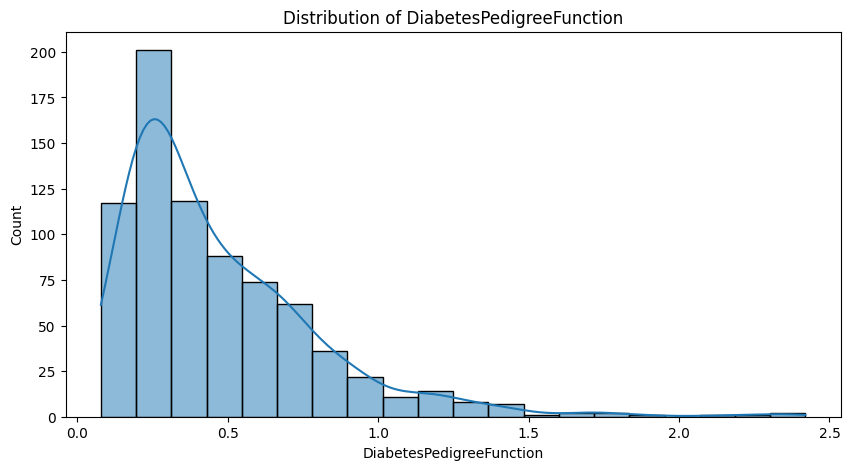

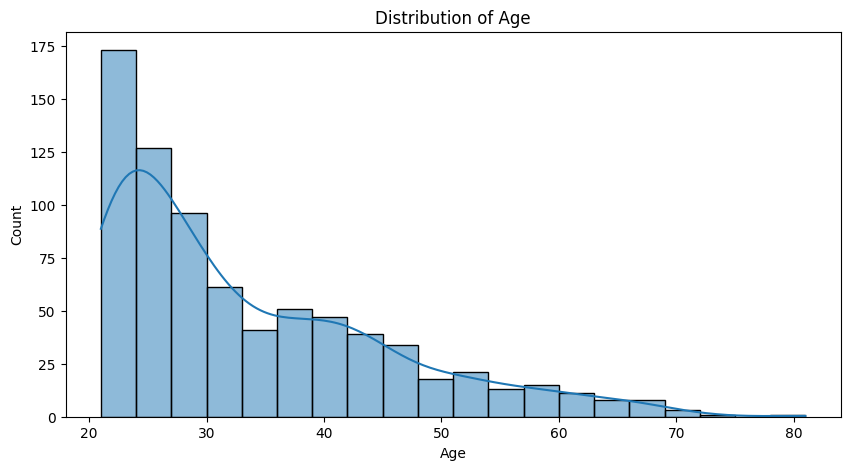

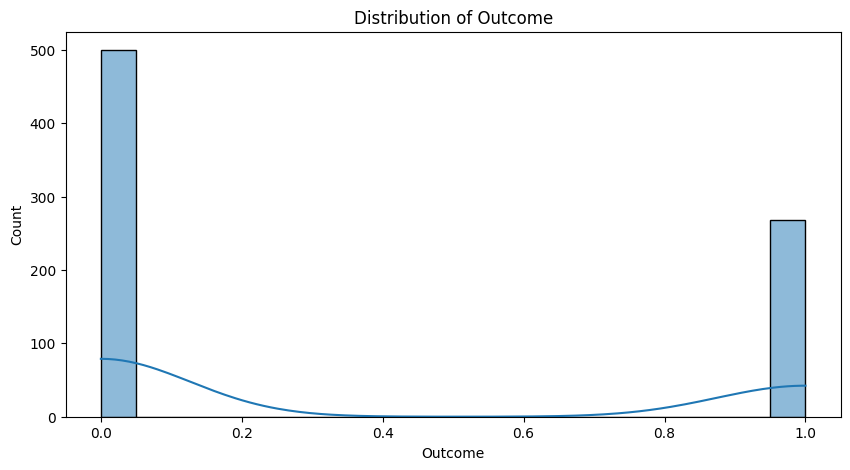

In [7]:
for feature in df.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[feature], kde=True, bins=20)
    plt.title(f"Distribution of {feature}")
    plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [9]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

df_scaled = X_scaled_df.copy()
df_scaled['Outcome'] = y
df_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,0
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,0
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,0
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1


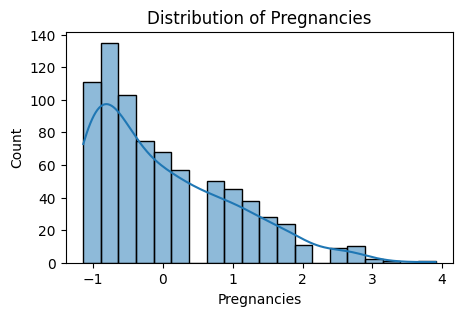

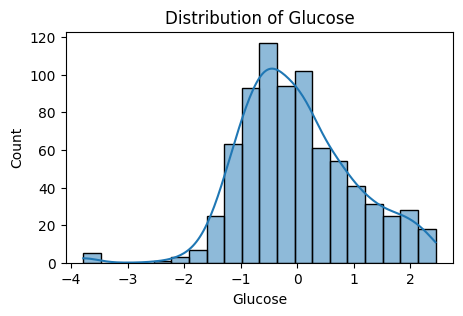

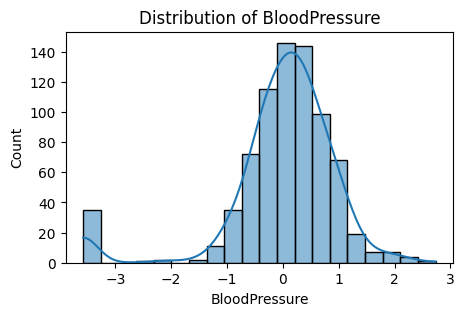

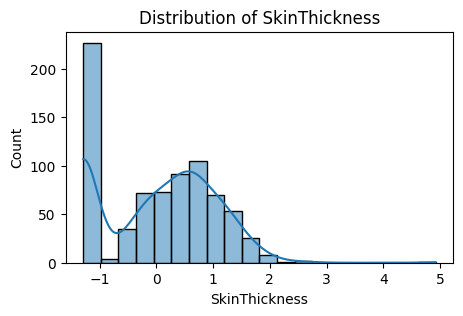

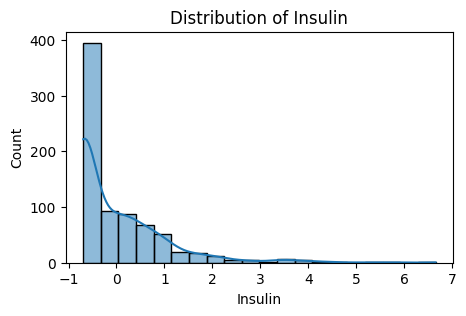

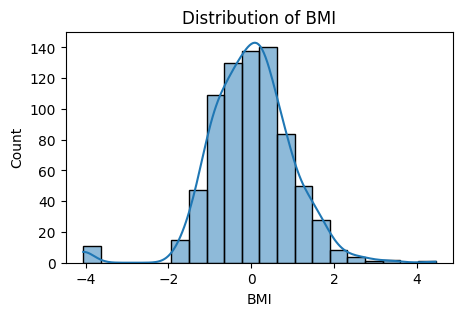

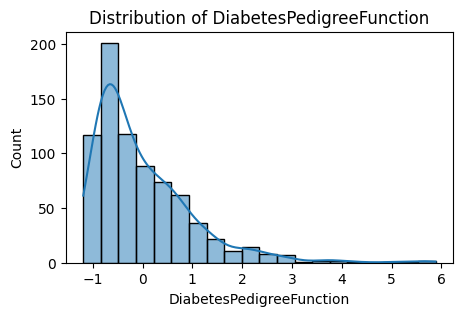

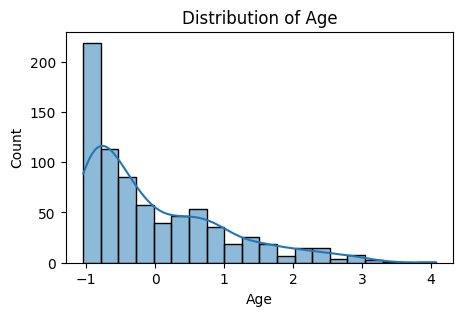

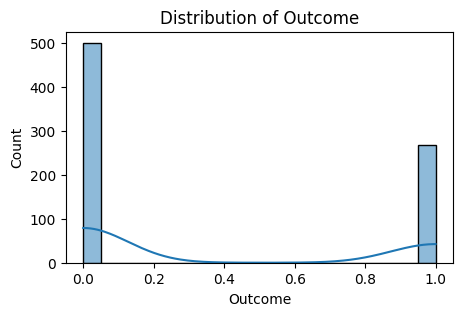

In [10]:
for feature in df_scaled.columns:
    plt.figure(figsize=(5, 3))
    sns.histplot(df_scaled[feature], kde=True, bins=20)
    plt.title(f"Distribution of {feature}")
    plt.show()

In [12]:
X = df_scaled.drop('Outcome', axis=1)
y = df_scaled['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7532


In [17]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

Random Forest Accuracy: 0.7273


In [18]:
confusion_matrix(y_test, y_pred_rf)

array([[78, 21],
       [21, 34]])

In [20]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        99
           1       0.62      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



In [21]:
import tensorflow as tf

In [22]:
X = df_scaled.drop('Outcome', axis=1)
y = df_scaled['Outcome']

In [23]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=42)

In [24]:
# Check the sizes of the splits
print(f"Training Set: {X_train.shape[0]} samples")
print(f"Validation Set: {X_val.shape[0]} samples")
print(f"Test Set: {X_test.shape[0]} samples")

Training Set: 621 samples
Validation Set: 70 samples
Test Set: 77 samples


In [46]:
input_size = 8
output_size = 1
hidden_size = 128

model = tf.keras.Sequential([
    tf.keras.Input(shape = (input_size,)),
    tf.keras.layers.Dense(hidden_size, activation= 'relu'),
    tf.keras.layers.Dense(hidden_size, activation= 'tanh'),
    tf.keras.layers.Dense(hidden_size, activation= 'relu'),
    tf.keras.layers.Dense(output_size, activation= 'sigmoid'),
])

In [47]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 * 0.95 ** epoch)
model.compile(optimizer=optimizer, loss = 'binary_crossentropy', metrics= ['accuracy'])

In [48]:
epochs = 20
history = model.fit(X_train,
          y_train,
          epochs=epochs,
          validation_data=(X_val, y_val),
          callbacks=[early_stopping, lr_scheduler],
          verbose = 2)

Epoch 1/20
20/20 - 1s - 63ms/step - accuracy: 0.7134 - loss: 0.5551 - val_accuracy: 0.7571 - val_loss: 0.4579 - learning_rate: 0.0010
Epoch 2/20
20/20 - 0s - 9ms/step - accuracy: 0.7665 - loss: 0.4698 - val_accuracy: 0.7571 - val_loss: 0.4639 - learning_rate: 9.5000e-04
Epoch 3/20
20/20 - 0s - 3ms/step - accuracy: 0.7923 - loss: 0.4542 - val_accuracy: 0.8000 - val_loss: 0.4285 - learning_rate: 9.0250e-04
Epoch 4/20
20/20 - 0s - 7ms/step - accuracy: 0.7874 - loss: 0.4430 - val_accuracy: 0.8000 - val_loss: 0.4089 - learning_rate: 8.5737e-04
Epoch 5/20
20/20 - 0s - 8ms/step - accuracy: 0.7971 - loss: 0.4331 - val_accuracy: 0.7571 - val_loss: 0.4469 - learning_rate: 8.1451e-04
Epoch 6/20
20/20 - 0s - 3ms/step - accuracy: 0.7858 - loss: 0.4384 - val_accuracy: 0.8000 - val_loss: 0.3967 - learning_rate: 7.7378e-04
Epoch 7/20
20/20 - 0s - 7ms/step - accuracy: 0.8019 - loss: 0.4311 - val_accuracy: 0.7571 - val_loss: 0.4426 - learning_rate: 7.3509e-04
Epoch 8/20
20/20 - 0s - 7ms/step - accuracy:

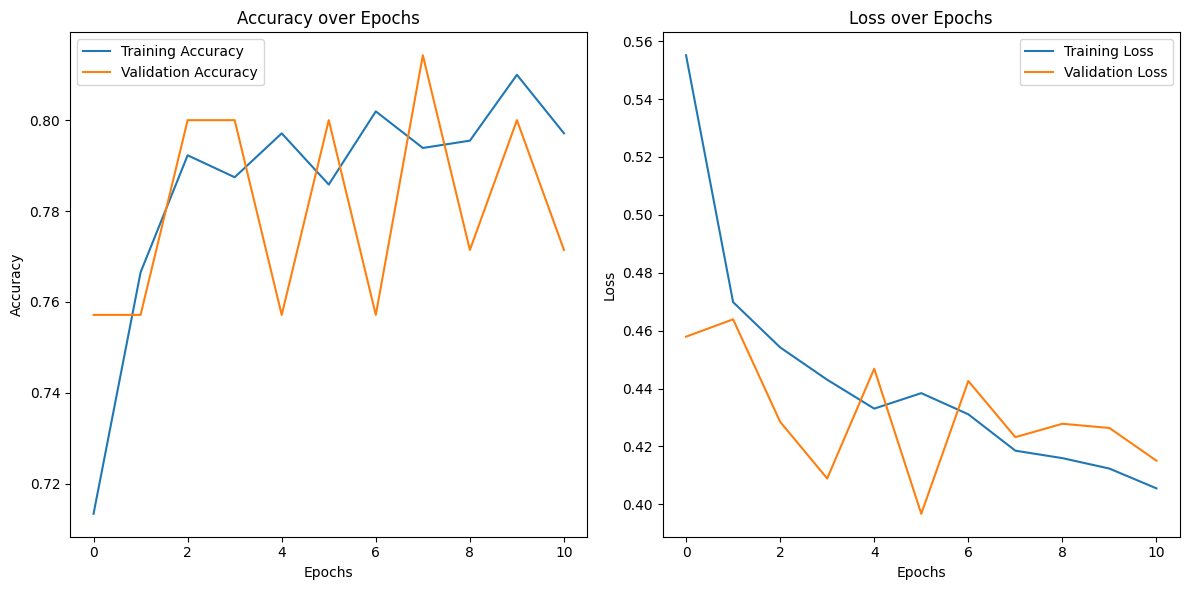

In [49]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [50]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7295 - loss: 0.5362 
Test Loss: 0.5368466377258301
Test Accuracy: 0.7402597665786743
